In [1]:
# load necessary packages
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
# Create an example dataset consisting of 100 genes and 12 samples
# Columns will be the 12 different samples
# Rows will be values of each of the 100 genes for each sample
genes = ['gene' + str(i) for i in range(1,101)]
wt    = ['wt' + str(i) for i in range(1, 6)] # wild type samples
ko    = ['ko' + str(i) for i in range(1, 6)] # knock out samples

In [4]:
# Build a pandas dataframe
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [7]:
# Create random data for each of the 12 samples
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [8]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,728,774,765,811,787,624,623,596,587,602
gene2,78,63,71,80,68,76,86,87,79,79
gene3,470,476,492,492,471,980,963,907,1008,974
gene4,221,193,223,217,210,673,651,698,674,643
gene5,586,553,557,574,555,586,609,595,609,584


In [9]:
data.shape

(100, 10)

In [10]:
data.describe()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
count,100,100,100,100,100,100,100,100,100,100
unique,95,97,99,96,95,94,94,95,88,95
top,85,66,114,164,417,317,835,381,172,921
freq,2,2,2,2,2,2,3,2,3,2


In [12]:
data.mean()

wt1    452.92
wt2    448.45
wt3    452.70
wt4    454.47
wt5    450.24
ko1    517.46
ko2    518.27
ko3    522.21
ko4    518.48
ko5    519.29
dtype: float64

In [13]:
data.std()

wt1    301.556356
wt2    298.996212
wt3    300.016784
wt4    301.733525
wt5    299.376528
ko1    285.276524
ko2    285.278806
ko3    288.580374
ko4    285.203400
ko5    286.204924
dtype: float64

In [14]:
#center the data by scaling
scaled_data = preprocessing.scale(data.T)

In [18]:
pca = PCA()

In [19]:
# compute loading score and PC variation 
pca.fit(scaled_data)

PCA()

In [20]:
# Generate coordinates for PCA graph
pca_data = pca.transform(scaled_data)

In [22]:
# Compute percentage of variation for each principal component
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [23]:
per_var

array([91.5,  2.5,  1.9,  1.3,  1. ,  0.8,  0.6,  0.3,  0.2,  0. ])

In [24]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

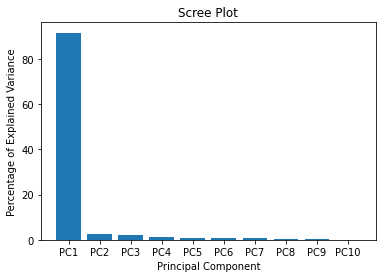

In [25]:
# Use matplotlib to create a scree plot
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Next, draw a PCA plot using PC1 and PC2

In [28]:
# Create a matrix where rows have sample labels and columns have PC labels
# Data will PC coordinates for each sample-row pair
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

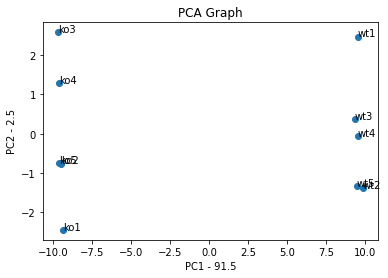

In [29]:
# Draw a nice scatter plot with PC coordinates
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel(f'PC1 - {per_var[0]}')
plt.ylabel(f'PC2 - {per_var[1]}')

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()    

In [30]:
# ko samples are clustered on one side, suggesting they are correlated
# wt samples cluster on the other side, suggesting they are correlated
# The separation of the two clusters along the x-axis suggests that 
# wt samples are different from ko samples

In [31]:
# Look at loading scores for PC1 to determine which genes had the largest
# influence on separting the two clusters along the x-axis
loading_scores = pd.Series(pca.components_[0], index=genes) #PC1 is index 0

In [33]:
# sort loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [35]:
# Get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

In [37]:
loading_scores[top_10_genes]
# Values should all be pretty similar, indicating many genes play a role in separing samples

gene37   -0.104531
gene62   -0.104528
gene21    0.104521
gene52    0.104511
gene39   -0.104501
gene8    -0.104499
gene99   -0.104484
gene13    0.104482
gene83    0.104480
gene78   -0.104478
dtype: float64